In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv("weatherHistory.csv")

In [4]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
data.columns=["date","summary","preciptype","temp","aptemp","humidity","wspeed","wbear","visibility","loudcover","pressure","dailysum"]

In [6]:
data["preciptype"]=np.where(data["preciptype"]=="rain",1,0)

In [7]:
cols=["temp","humidity","wspeed","wbear","visibility","loudcover","pressure"]

In [8]:
data['preciptype'].value_counts()

1    85224
0    11229
Name: preciptype, dtype: int64

In [9]:
x=data[cols]

In [10]:
y=data["preciptype"]

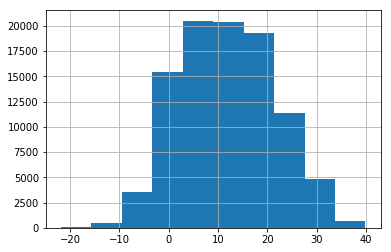

In [11]:
data.temp.hist()

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

c:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred_class = logreg.predict(X_test)

In [15]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.9864808824749108


calculating percentage of 1

In [16]:
y_test.value_counts()

1    21337
0     2777
Name: preciptype, dtype: int64

In [17]:
y_test.mean()

0.8848386829227834

calculating percentage of 0

In [18]:
1 - y_test.mean()

0.11516131707721655

In [19]:
max(y_test.mean(), 1 - y_test.mean())

0.8848386829227834

 we can see that this model would predict 1 88% of the time

so its easy for the model to get a good accuracy predicting 1 most of the time,it is more like a dumb model


In [20]:
y_test.value_counts().head(1) / len(y_test)

1    0.884839
Name: preciptype, dtype: float64

In [21]:
print('True:', y_test.values[1200:1225])
print('Predicted:', y_pred_class[1200:1225])

True: [0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1]
Predicted: [0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1]


It can be seen that all the values are correct for the predicted set


In [22]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 2567   210]
 [  116 21221]]


we can see  actual 210 0s are predicted as 1
116 actual 1s are predicted 0

         predicted 0      predicted 1

actual 0    2775             210

actual 1     116             21337


above is the actual meaning of the generated confusion matrix


In [23]:
print('True', y_test.values[0:25])
print('Pred', y_pred_class[0:25])

True [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
Pred [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [24]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[ 2567   210]
 [  116 21221]]


In [25]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9864808824749108
0.9864808824749108


In this way we can check how often the classifier is correct

In [26]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.01351911752508916
0.013519117525089164


above is the misclassification error rate

Sensitivity is when the actual value is 1,how often the predction is 1
1. This is something we want to maximize
2. TP/all positive
   all positive= True positive + False negative

In [27]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.9945634344097108
0.9945634344097108


Specificity:  when the actual value is negative,how often is predicted value also negative
1. Something we want to maximize
2. =TN/all negative
3. all negatie=TN+FP

In [28]:
specificity = TN / (TN + FP)

print(specificity)

0.9243788260713


we can tell that our classifier is
1. More sensitive
2. little less specific compared to sensitivity

Next is the false positive rate
This is something we want to minimize

In [29]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.07562117392870003
0.07562117392870005


Precision: When a positive value is predicted,how often the prediction is correct

In [30]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.9902011105408054
0.9902011105408054


Conclusion:

1. Confusion matrix gives you a more complete picture of how your classifier is performing
2. Also allows you to compute various classification metrics, and these metrics can guide your model selection


The choice of metrics depends on the business objective

If the business is of a super market, then false positive occurence can given less priority but false negative should highly be avoided
But if the situation is of a CBI security,then false positive should highly be avoided

# Adjusting the classification threshold

In [31]:
logreg.predict(X_test)[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
logreg.predict_proba(X_test)[0:10]

array([[3.67662220e-06, 9.99996323e-01],
       [3.08726907e-05, 9.99969127e-01],
       [1.64117853e-09, 9.99999998e-01],
       [3.92153501e-06, 9.99996078e-01],
       [1.98913713e-05, 9.99980109e-01],
       [7.20292633e-05, 9.99927971e-01],
       [3.36101914e-01, 6.63898086e-01],
       [1.72795225e-05, 9.99982720e-01],
       [7.72797382e-11, 1.00000000e+00],
       [3.70220248e-08, 9.99999963e-01]])

In [33]:
logreg.predict_proba(X_test)[0:10, 1]

array([0.99999632, 0.99996913, 1.        , 0.99999608, 0.99998011,
       0.99992797, 0.66389809, 0.99998272, 1.        , 0.99999996])

In [34]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0,0.5,'Frequency')

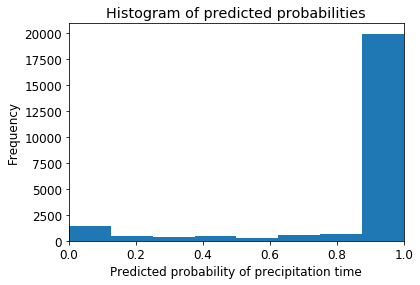

In [97]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of precipitation time')
plt.ylabel('Frequency')

from here we can see % of the observation are 1

#  Receiver Operating Characteristic (ROC) Curves

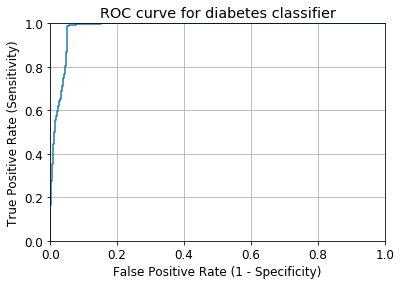

In [38]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help to choose a threshold that balances sensitivity and specificity

In [39]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [40]:
evaluate_threshold(0.5)

Sensitivity: 0.9945634344097108
Specificity: 0.9243788260713


In [41]:
evaluate_threshold(0.3)

Sensitivity: 1.0
Specificity: 0.821750090025207


In [42]:
evaluate_threshold(0.4)

Sensitivity: 1.0
Specificity: 0.821750090025207


In [44]:
evaluate_threshold(0.8)

Sensitivity: 0.9486338285607161
Specificity: 0.9499459848757652


we can see that the best threshold is 0.8

#  AUC

AUC is the percentage of the ROC plot that is underneath the curve

In [45]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.9792254715043323


As we can see higher the value of AUC better is the classifier

So we can say there is higher probbility that predicted result will be correct

In [47]:
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, x, y, cv=10, scoring='roc_auc').mean()

0.9819117504796802

1. Advantages of Confusion matrix
   Allows you to calculate a variety of metric
   
2. ROC/AUC advantages:
   Does not require you to set a classification threshold

# Confusion Matrix

This is useful when we want to design a model according to the business strategies
Its focus is on the predictive capability of a model  rather than how fast the model takes to perform the classification, scalability
However the confusion matrix only tell us how the classifier is behaving for individual classes


# ROC and AUC

 A ROC curve plots the performance of a binary classifier under various threshold settings.

A perfect classifier has a 100% true positive rate and 0% false positive rate, so its ROC curve passes through the upper left corner of the square. 

The AUC (Area Under Curve) is the area enclosed by the ROC curve

AUC is good for classification problems with a class imbalance.

AUC scoring lets us evaluate models independently of the threshold